In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/alex_1/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)

In [4]:
sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

#Gather relevant columns from order book data
#-------------------------------------------
S1_mid_price = prices[sym1]
S2_mid_price = prices[sym2]
#-------------------------------------------
S1_ask_price = prices[S1_ask_price]
S1_ask_amount = prices[S1_ask_amount]
S1_bid_price = prices[S1_bid_price]
S1_bid_amount = prices[S1_bid_amount]
#-------------------------------------------
S2_ask_price = prices[S2_ask_price]
S2_ask_amount = prices[S2_ask_amount]
S2_bid_price = prices[S2_bid_price]
S2_bid_amount = prices[S2_bid_amount]
#-------------------------------------------


Testing strategy on pair: eth_mid_price and wbeth_mid_price ...


# Slippage 
---

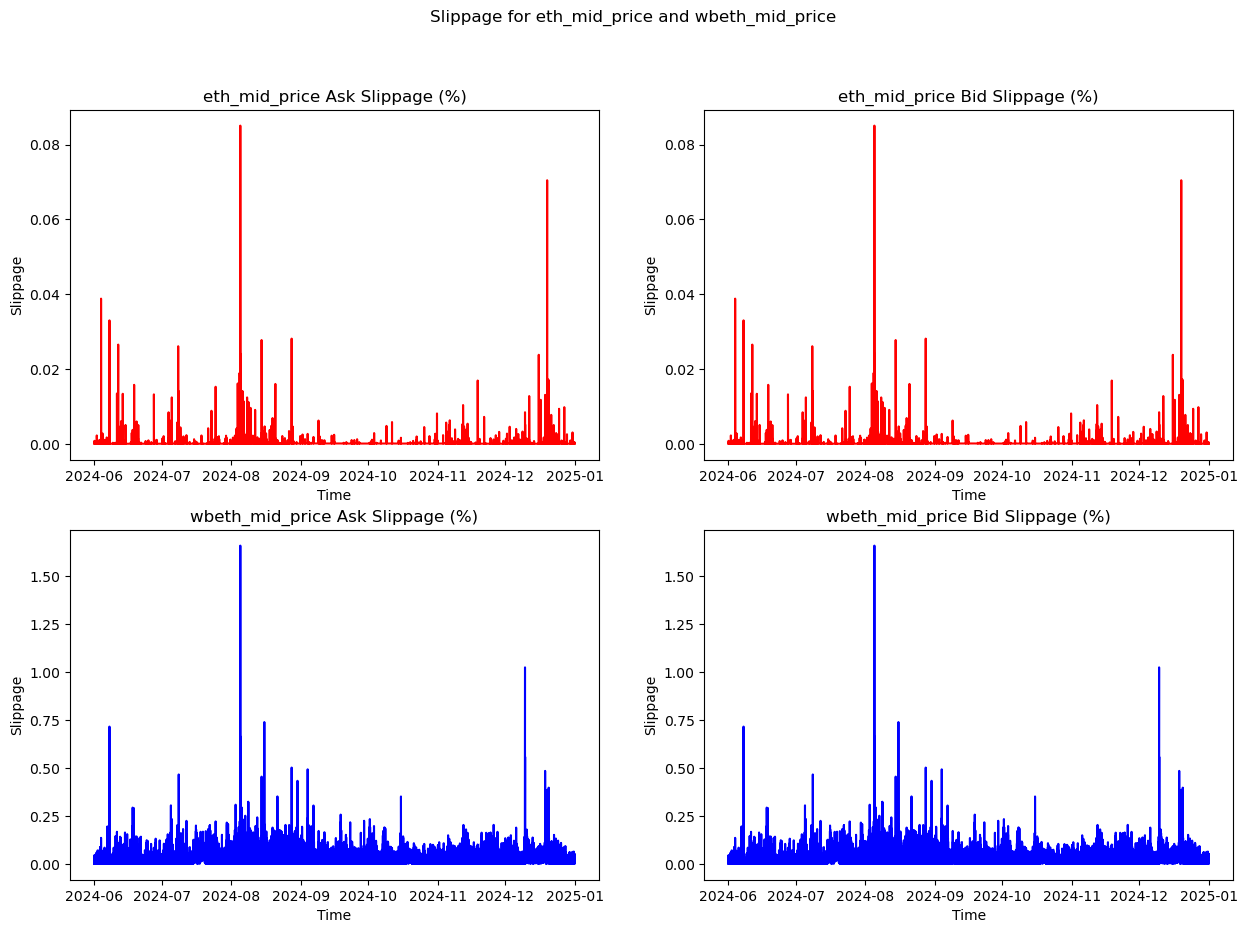

In [21]:
#Compute percentage slippage

S1_ask_slippage_percentage = (S1_ask_price - S1_mid_price) / S1_mid_price * 100
S1_bid_slippage_percentage = (S1_mid_price - S1_bid_price) / S1_mid_price * 100
S2_ask_slippage_percentage = (S2_ask_price - S2_mid_price) / S2_mid_price * 100
S2_bid_slippage_percentage = (S2_mid_price - S2_bid_price) / S2_mid_price   * 100

#Plot slippage on subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f"Slippage for {sym1} and {sym2}")
axs[0, 0].plot(S1_ask_slippage_percentage, color='red')
axs[0, 0].set_title(f'{sym1} Ask Slippage (%)')
axs[0, 0].set_ylabel('Slippage')
axs[0, 0].set_xlabel('Time')
axs[0, 1].plot(S1_bid_slippage_percentage, color='red')
axs[0, 1].set_title(f'{sym1} Bid Slippage (%)')
axs[0, 1].set_ylabel('Slippage')
axs[0, 1].set_xlabel('Time')
axs[1, 0].plot(S2_ask_slippage_percentage, color='blue')
axs[1, 0].set_title(f'{sym2} Ask Slippage (%)')
axs[1, 0].set_ylabel('Slippage')
axs[1, 0].set_xlabel('Time')
axs[1, 1].plot(S2_bid_slippage_percentage, color='blue')
axs[1, 1].set_title(f'{sym2} Bid Slippage (%)')
axs[1, 1].set_ylabel('Slippage')
axs[1, 1].set_xlabel('Time')
plt.show()


# Spreads
---

Average spread for eth_mid_price: 0.01038844217355605
Average spread for wbeth_mid_price: 1.826127816497917


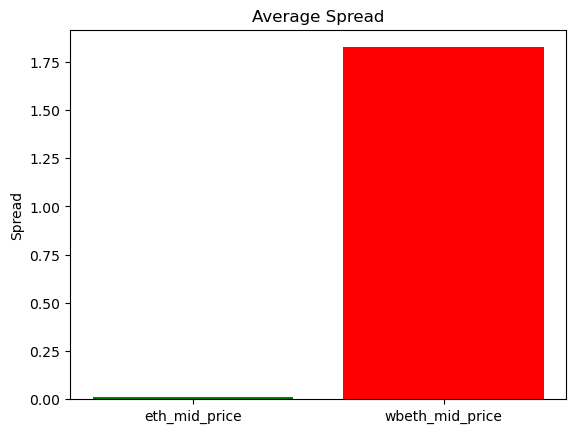

In [13]:
#Calculate average spread for each asset
S1_avg_spread = (S1_ask_price - S1_bid_price).mean()
S2_avg_spread = (S2_ask_price - S2_bid_price).mean()
print(f"Average spread for {sym1}: {S1_avg_spread}")
print(f"Average spread for {sym2}: {S2_avg_spread}")

#Plot average spread for each asset on a bar chart
fig, ax = plt.subplots()
ax.bar([sym1, sym2], [S1_avg_spread, S2_avg_spread], color=['green', 'red'])
ax.set_title('Average Spread')
ax.set_ylabel('Spread')
plt.show()
